# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [7]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

# Split the dataset into X and y (target feature)
X= data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']] # data.iloc[:, :13]
y = data['MEDV']



## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.linear_model import LinearRegression

In [20]:

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [21]:

# Create the linear regression model
model = LinearRegression()
#Fitting the model
model.fit(X_train, y_train)  

# Predictions on training and testing sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [22]:

# Model evaluation

#The coeficient of ddetermination indicates how well the model's predictions match the actual data.
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R^2 Score: {r2_train:.4f}")
print(f"Test R^2 Score: {r2_test:.4f}")

#This indicates that the model explains 66.88% of the variance in the target 
#variable on the test data. This is slightly lower than the training score, 
#suggesting that the model performs reasonably well on unseen data but may have some overfitting.

Train R^2 Score: 0.7509
Test R^2 Score: 0.6688


## 4. Calculate and print mean squared error for both the training and the testing set.

In [23]:

# RMSE measures the average magnitude of the errors between predicted and actual values, giving a sense of how much the predictions deviate from the actual values.
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)


print(f"Train RMSE: {train_rmse:.2f}")  # indicates that, on average, the model's predictions deviate from the actual values by 4.65 units on the training data.
print(f"Test RMSE: {test_rmse:.2f}")  # indicates that, on average, the model's predictions deviate from the actual values by 4.93 units on the test data.

## sensitive to outliers bc is squared

Train RMSE: 4.65
Test RMSE: 4.93


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [24]:
# Model evaluation
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)


print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")

## every time we make a preddiction we are 3.3 points 

Train MAE: 3.31
Test MAE: 3.19


## Classification Model Evaluation

In [25]:
from sklearn.datasets import load_iris

In [26]:
data = load_iris()

In [31]:
X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#plt.figure(figsize=(8,8))
#pd.options.plotting.backend = "plotly"
#sns.set(rc={'figure.figsize':(6,6)});

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=4)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [34]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [35]:
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

    This function resolves the 8,9,10,11,12 & 13 exercices.

In [36]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
print(acc_train)
print(acc_test)

0.9833333333333333
0.9666666666666667


In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      0.96      0.98        45
           2       0.95      1.00      0.98        41

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.80      0.89         5
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [38]:
from sklearn.metrics import balanced_accuracy_score

print(balanced_accuracy_score(y_train, y_pred_train))
print(balanced_accuracy_score(y_test, y_pred_test))


0.9851851851851853
0.9333333333333332


In [39]:
## precision score

print(precision_score(y_train, y_pred_train, average='macro'))
print(precision_score(y_test, y_pred_test, average='macro'))


0.9844961240310077
0.9666666666666667


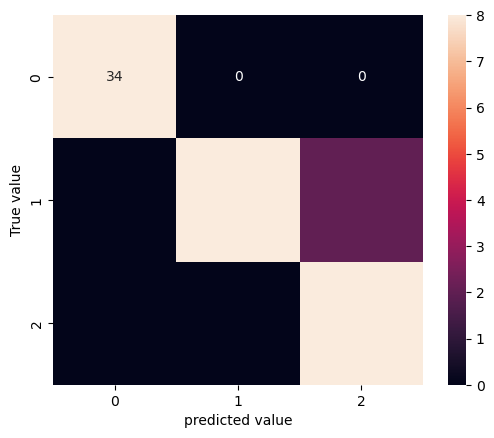

In [41]:
%matplotlib inline
sns.heatmap(confusion_matrix(y_train, y_pred_train), vmax=8, square=True,annot=True)
plt.xlabel("predicted value")
plt.ylabel("True value")
plt.show()

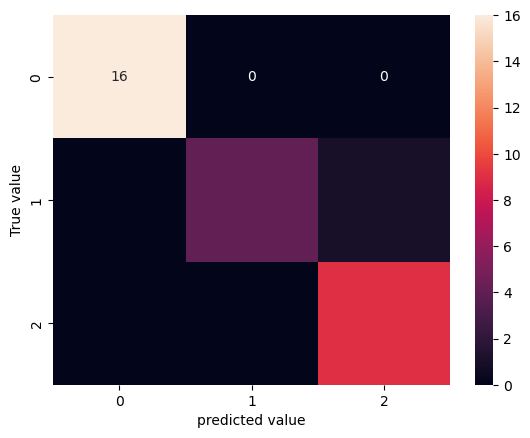

In [51]:
sns.heatmap(confusion_matrix(y_test, y_pred_test),annot=True)
plt.xlabel("predicted value")
plt.ylabel("True value")
plt.show();


In [47]:
confusion_matrix(y_test, y_pred_test)

array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  0,  9]])

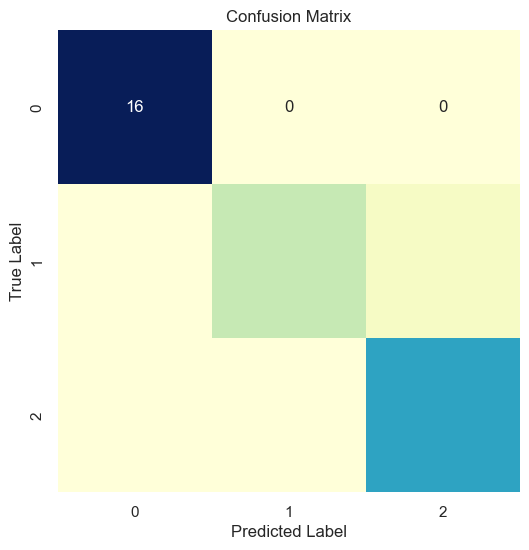

In [54]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False, square=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()